In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [5]:
df = pd.read_csv('2024_10_25_17val44min_III_P_K_A_params.dat', sep=';')
df.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
0,[?],[?],[V],[mA/cm^2],[%],[V],[mA/cm^2],[mW/cm^2],[%],[cm^2],[min.]
1,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.126249999999999,-8.9247,8.9247,0.08,-1.0
2,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0
3,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18,-8.2285,8.2285,0.08,-1.0
4,P_III_REF_2k_10-25,BW,1.035,-13.8441,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0


In [11]:
ndf = df.iloc[1:]
ndf.columns

Index(['SC ', ' F/B ', ' Uoc ', ' jsc ', ' FF ', ' Umax ', ' jmax ', ' Pmax ',
       ' PCE', ' S', ' t'],
      dtype='object')

In [24]:
def get_pavadinimas(x):
    if 'REF' in x:
        return 'REF'
    elif 'PCBM+BCP' in x:
        return 'V1547 3S PCBM BCP'
    elif '3S+BCP' in x:
        return 'V1547 3S BCP'
    else:
        return 'V1547 3S'
    
    
    
ndf['pavadinimas'] = ndf['SC '].apply(get_pavadinimas)
ndf.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t,pavadinimas
1,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.126249999999999,-8.9247,8.9247,0.08,-1.0,REF
2,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0,REF
3,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18,-8.2285,8.2285,0.08,-1.0,REF
4,P_III_REF_2k_10-25,BW,1.035,-13.8441,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0,REF
5,P_III_REF_3k_10-25,FW,0.957,-12.25571,59.4133,0.723,-9.63875,-6.9684,6.9684,0.08,-1.0,REF


In [32]:
abs(-14)

14

In [34]:
def get_jsc(x):
    return abs(float(x))

ndf['jsc'] = ndf[' jsc '].apply(get_jsc)
ndf.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t,pavadinimas,jsc
1,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.126249999999999,-8.9247,8.9247,0.08,-1.0,REF,14.83888
2,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0,REF,14.98405
3,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18,-8.2285,8.2285,0.08,-1.0,REF,13.43314
4,P_III_REF_2k_10-25,BW,1.035,-13.8441,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0,REF,13.84410
5,P_III_REF_3k_10-25,FW,0.957,-12.25571,59.4133,0.723,-9.63875,-6.9684,6.9684,0.08,-1.0,REF,12.25571


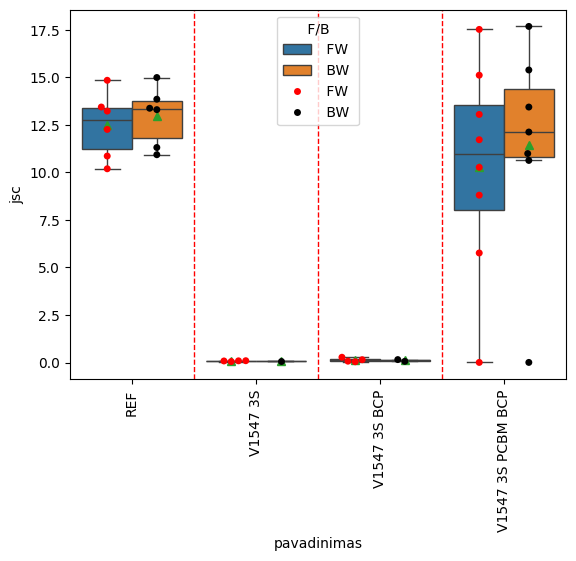

In [55]:
fig, ax = plt.subplots()
sns.boxplot(data=ndf, x='pavadinimas', y='jsc', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(data=ndf, x='pavadinimas', y='jsc', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax.tick_params(axis='x', rotation=90)

# Add dashed lines between different x categories
x_positions = range(len(ndf['pavadinimas'].unique()))  # x positions for each category
for x in x_positions[1:]:  # Start from the second category
    plt.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
plt.show()

In [52]:
def get_uoc(x):
    return abs(float(x))

ndf['uoc'] = ndf[' Uoc '].apply(get_uoc)

udf = ndf[ndf['uoc'] < 1.2]



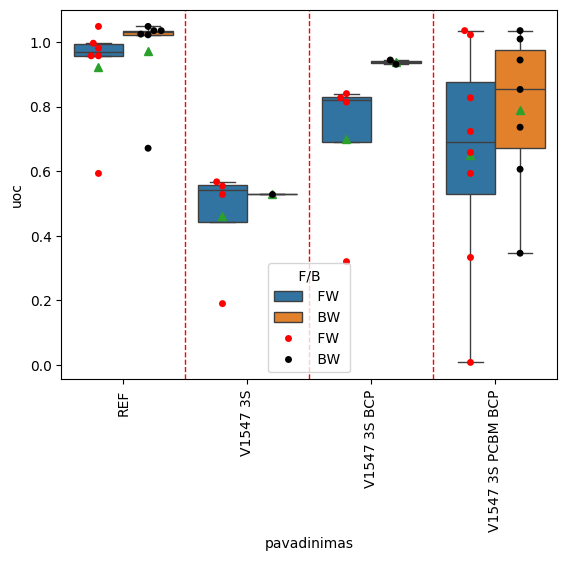

In [61]:
fig, ax = plt.subplots()
sns.boxplot(data=ndf, x='pavadinimas', y='uoc', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(data=ndf, x='pavadinimas', y='uoc', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax.tick_params(axis='x', rotation=90)

# Add dashed lines between different x categories
x_positions = range(len(ndf['pavadinimas'].unique()))  # x positions for each category
for x in x_positions[1:]:  # Start from the second category
    plt.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
plt.show()

In [50]:
def get_ff(x):
    return float(x)

ndf['ff'] = ndf[' FF '].apply(get_ff)

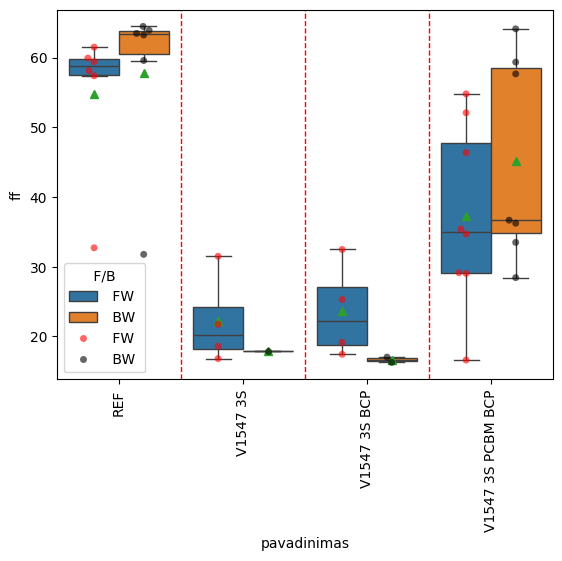

In [62]:
fig, ax = plt.subplots()
sns.boxplot(data=ndf, x='pavadinimas', y='ff', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(data=ndf, x='pavadinimas', y='ff', hue=' F/B ', alpha=0.6, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax.tick_params(axis='x', rotation=90)

# Add dashed lines between different x categories
x_positions = range(len(ndf['pavadinimas'].unique()))  # x positions for each category
for x in x_positions[1:]:  # Start from the second category
    plt.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
plt.show()

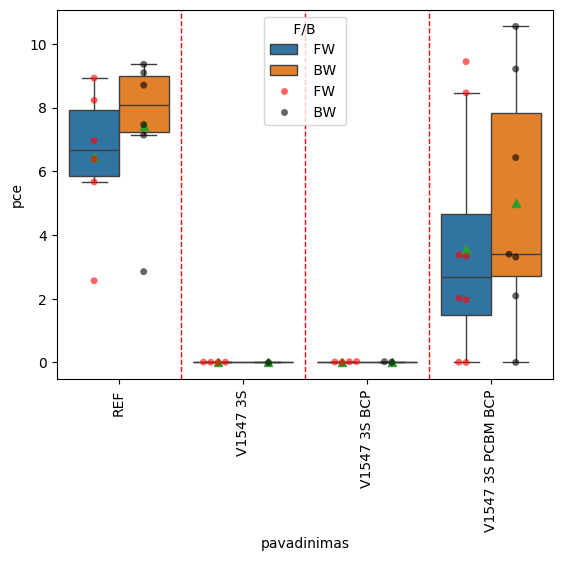

In [65]:
def get_pce(x):
    return abs(float(x))

ndf['pce'] = ndf[' PCE'].apply(get_pce)

fig, ax = plt.subplots()
sns.boxplot(data=ndf, x='pavadinimas', y='pce', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(data=ndf, x='pavadinimas', y='pce', hue=' F/B ', alpha=0.6, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax.tick_params(axis='x', rotation=90)

# Add dashed lines between different x categories
x_positions = range(len(ndf['pavadinimas'].unique()))  # x positions for each category
for x in x_positions[1:]:  # Start from the second category
    plt.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
plt.show()


In [87]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(ax=ax1, data=ndf, x='pavadinimas', y='jsc', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(legend=False, ax=ax1, data=ndf, x='pavadinimas', y='jsc', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel(' Jsc (mA/cm^2)')
ax1.set_xlabel('Medžiagos, REF - MeO - 2PACz')

sns.boxplot(ax=ax2, data=ndf, x='pavadinimas', y='uoc', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(legend=False, ax=ax2, data=ndf, x='pavadinimas', y='uoc', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('U [V]')
ax2.set_xlabel('Medžiagos, REF - MeO - 2PACz')


sns.boxplot(ax=ax3, data=ndf, x='pavadinimas', y='ff', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(legend=False, ax=ax3, data=ndf, x='pavadinimas', y='ff', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('FF [%]')
ax3.set_xlabel('Medžiagos, REF - MeO - 2PACz')



sns.boxplot(ax=ax4, data=ndf, x='pavadinimas', y='pce', hue=' F/B ', showmeans=True, showfliers=False)
sns.swarmplot(legend=False, ax=ax4, data=ndf, x='pavadinimas', y='pce', hue=' F/B ', alpha=1, dodge=True, palette={" FW ": "red", " BW ": "black"})
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylabel('PCE [%]')
ax4.set_xlabel('Medžiagos, REF - MeO - 2PACz')

x_positions = range(len(ndf['pavadinimas'].unique()))  # x positions for each category
for x in x_positions[1:]:  # Start from the second category
    ax1.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
    ax2.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
    ax3.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)
    ax4.axvline(x - 0.5, color='red', linestyle='--', linewidth=1)

fig.tight_layout()
plt.show()


ValueError: 
J_{\text{sc}} \, \down( \text{mA/cm}^2 \right)
                 ^
ParseFatalException: Unknown symbol: \down, found '\'  (at char 17), (line:1, col:18)

ValueError: 
J_{\text{sc}} \, \down( \text{mA/cm}^2 \right)
                 ^
ParseFatalException: Unknown symbol: \down, found '\'  (at char 17), (line:1, col:18)

<Figure size 800x800 with 4 Axes>